In [26]:
import numpy as np
import pandas as pd
import os

In [27]:
df = pd.read_csv("forestfires.csv")

In [28]:
df_coordinates = df.loc[:, ["X", "Y"]]
coordinates = df_coordinates.values

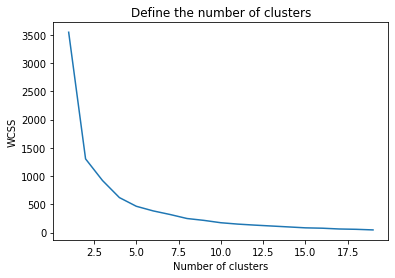

In [29]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, 
                    n_init = 10, random_state = 0)
    #max_iter - max number of iteration to define the final clusers
    #n_init - number of k_means algorithm running
    kmeans.fit(coordinates)
    wcss.append(kmeans.inertia_)
    #inertia_ Sum of squared distances of samples to their closest cluster center.
plt.plot(range(1, 20), wcss)
plt.title('Define the number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

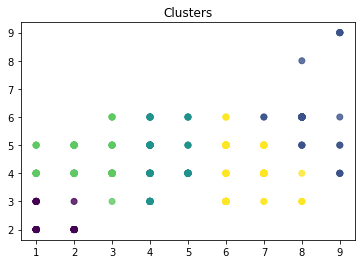

[[1.47272727 2.2       ]
 [8.15277778 6.08333333]
 [4.24793388 4.24793388]
 [2.29752066 4.31404959]
 [6.44594595 4.24324324]]

Calculating distance between clusters

[[0.         7.72679445 3.44902956 2.26924873 5.3765925 ]
 [7.72679445 0.         4.31468388 6.11673122 2.50982199]
 [3.44902956 4.31468388 0.         1.95153351 2.19801707]
 [2.26924873 6.11673122 1.95153351 0.         4.14902951]
 [5.3765925  2.50982199 2.19801707 4.14902951 0.        ]]


In [30]:
from scipy.spatial import distance
from sklearn.metrics.pairwise import euclidean_distances
plt.figure()
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, 
                    n_init = 10, random_state = 0)
clusters = kmeans.fit_predict(coordinates)
df["Cluster"]= clusters
plt.subplot()
plt.scatter(df['X'].values, df['Y'].values, marker='o', c=clusters, alpha=0.8)
plt.title("Clusters")
plt.show()
centroids = kmeans.cluster_centers_
print(centroids)
print("\nCalculating distance between clusters\n")
print(euclidean_distances(centroids,centroids))

In [31]:
df_cluster0 = df[(df["Cluster"] == 0)] 
df_cluster0.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,fire,Cluster
58,2,2,feb,mon,84.0,9.3,34.0,2.1,13.9,40,5.4,0.0,0.0,0,0
59,2,2,feb,fri,86.6,13.2,43.0,5.3,12.3,51,0.9,0.0,0.0,0,0
60,2,2,mar,sun,89.3,51.3,102.2,9.6,11.5,39,5.8,0.0,0.0,0,0
61,2,2,mar,sun,89.3,51.3,102.2,9.6,5.5,59,6.3,0.0,0.0,0,0
62,2,2,aug,thu,93.0,75.3,466.6,7.7,18.8,35,4.9,0.0,0.0,0,0


In [32]:
import seaborn as sns
import numpy as np
def build_cluster_corr(df_cluster):
    df_cluster_indicators = df_cluster.loc[:, ["area","FFMC", "DMC", "DC", "ISI", "temp", "RH", "wind", "rain"]]
    plt.clf()
    plt.figure(figsize=(10,10))
    cmap = sns.diverging_palette(20, h_pos=220, s=75, l=50, sep=10, center='light', as_cmap=True)     
    corr_matrix = df_cluster_indicators.corr()
    corr_matrix[np.abs(corr_matrix) < 0.65] = 0
    sns.heatmap(corr_matrix, cmap=cmap, annot=True)     
    plt.show()

<Figure size 432x288 with 0 Axes>

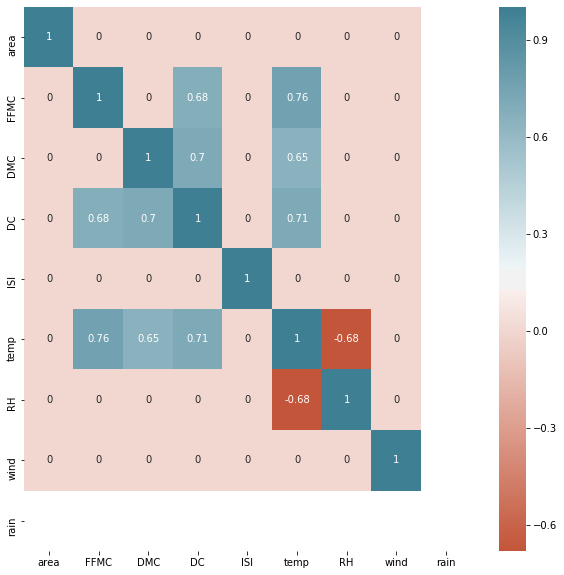

In [33]:
build_cluster_corr(df_cluster0)

In [34]:
df_cluster1 = df[(df["Cluster"] == 1)] 
df_cluster1.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,fire,Cluster
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,0,1
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,1
5,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0,0,1
6,8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0,0,1
7,8,6,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0,0,1


<Figure size 432x288 with 0 Axes>

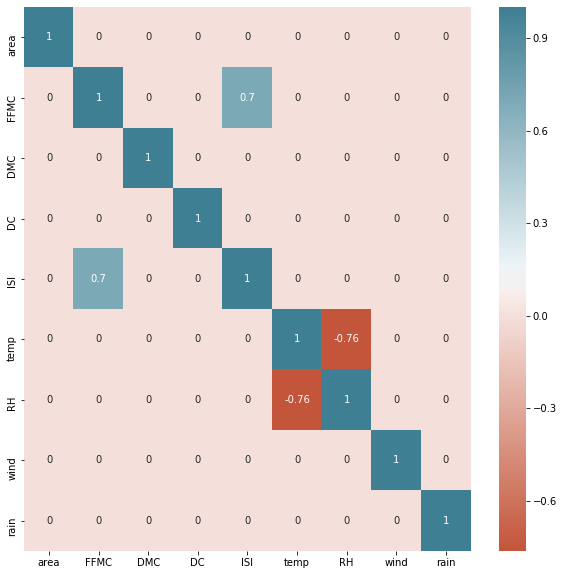

In [35]:
build_cluster_corr(df_cluster1)

In [36]:
df_cluster2 = df[(df["Cluster"] == 2)] 
df_cluster2.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,fire,Cluster
16,5,5,mar,sat,91.7,35.8,80.8,7.8,15.1,27,5.4,0.0,0.0,0,2
21,5,4,sep,mon,91.8,78.5,724.3,9.2,19.1,38,2.7,0.0,0.0,0,2
39,4,4,mar,tue,88.1,25.7,67.6,3.8,14.1,43,2.7,0.0,0.0,0,2
40,4,4,jul,tue,79.5,60.6,366.7,1.5,23.3,37,3.1,0.0,0.0,0,2
41,4,4,aug,sat,90.2,96.9,624.2,8.9,18.4,42,6.7,0.0,0.0,0,2


<Figure size 432x288 with 0 Axes>

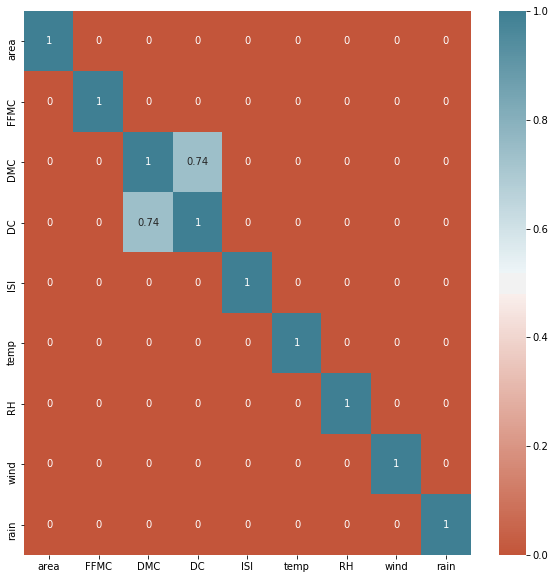

In [37]:
build_cluster_corr(df_cluster2)

In [38]:
df_cluster3 = df[(df["Cluster"] == 3)] 
df_cluster3.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,fire,Cluster
96,3,4,feb,sat,83.9,8.0,30.2,2.6,12.7,48,1.8,0.0,0.0,0,3
97,3,4,mar,sat,69.0,2.4,15.5,0.7,17.4,24,5.4,0.0,0.0,0,3
98,3,4,aug,sun,91.4,142.4,601.4,10.6,11.6,87,4.5,0.0,0.0,0,3
99,3,4,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,0.0,0,3
100,3,4,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,0.0,0,3


<Figure size 432x288 with 0 Axes>

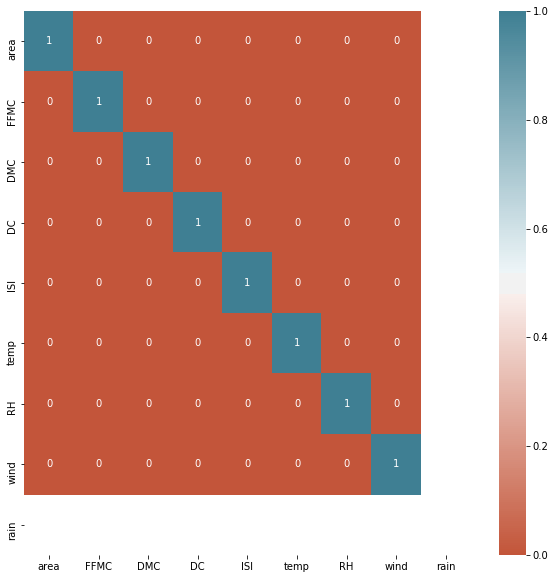

In [39]:
build_cluster_corr(df_cluster3)

In [24]:
df_cluster4 = df[(df["Cluster"] == 4)] 
df_cluster4.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,fire,Cluster
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,0,4
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,4
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,4
9,7,5,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0,0,4
10,7,5,sep,sat,92.5,88.0,698.6,7.1,17.8,51,7.2,0.0,0.0,0,4


<Figure size 432x288 with 0 Axes>

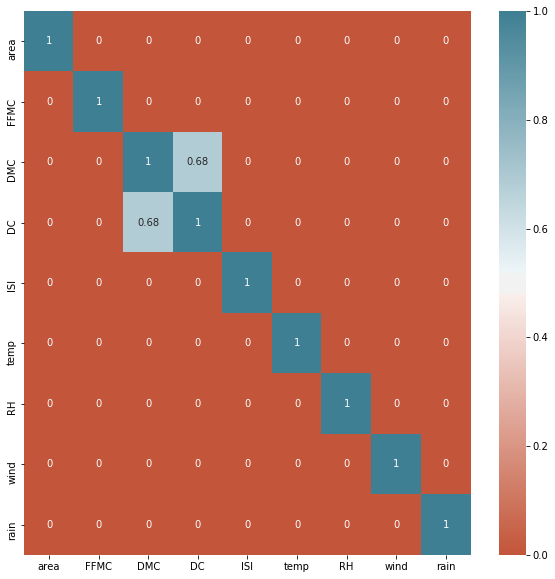

In [25]:
build_cluster_corr(df_cluster4)